In [8]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("nlp_dataset/raw/fake_or_real_news.csv")
df = df.set_index("Unnamed: 0") 
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [14]:
def get_text_length(x):
    return len(x.split())

df['text_lenght']= df['text'].apply(get_text_length)
print('Average number of words for input text', df['text_lenght'].mean())
print('Minimum number of words for input text', df['text_lenght'].min())
print('Maximum number of words for input text', df['text_lenght'].max())

Average length of input text 776.300710339


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=53)
print('Train data dims', X_train.shape, y_train.shape)
print('Test data dims', X_test.shape, y_test.shape)

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Preprocessing: Count vectors and tdidf vectors

In [18]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train) 
count_test = count_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors","Multinomial Naive Bayes", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost","QDA"]

classifiers = [
    KNeighborsClassifier(3),
    MultinomialNB(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    QuadraticDiscriminantAnalysis()]

accuracy:   0.863
Confusion matrix, without normalization


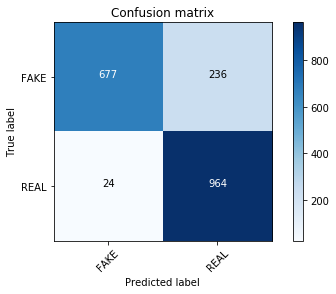

In [21]:
clf.fit(tfidf_train, y_train)
clf.fit(tfidf_train, y_train)


score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
for name, clf in zip(names, classifiers):
    pred_count = clf.fit(count_train, y_train).predict(count_test)
    pred_tdfidf = clf.fit(tfidf_train, y_train).predict(tfidf_test)
    score_count = metrics.accuracy_score(y_test,pred_count)
    score_tdidf = metrics.accuracy_score(y_test, pred_tdfidf)
    print("Classifier {0}, Accuracy (count): {1}, Accuracy (tdfidf): {2}".format(name, score_count,score_tdidf))
    #cm = metrics.confusion_matrix(y_test, pred_tdfidf, labels=['FAKE', 'REAL'])
    #plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Classifier Nearest Neighbors, Accuracy (count): 0.8048395581273015, Accuracy (tdfidf): 0.5686480799579169
Classifier Multinomial Naive Bayes, Accuracy (count): 0.9021567596002105, Accuracy (tdfidf): 0.8632298790110469
Classifier Linear SVM, Accuracy (count): 0.9158337716991057, Accuracy (tdfidf): 0.7343503419253025
Classifier RBF SVM, Accuracy (count): 0.5170962651236192, Accuracy (tdfidf): 0.9058390320883746
Classifier Decision Tree, Accuracy (count): 0.7853761178327197, Accuracy (tdfidf): 0.7932667017359285
Classifier Random Forest, Accuracy (count): 0.5107837980010521, Accuracy (tdfidf): 0.49237243556023147
Classifier Neural Net, Accuracy (count): 0.9168858495528669, Accuracy (tdfidf): 0.9042609153077328
